# Author : Pratik korat

In [38]:
# Importing neccesary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import matplotlib.pyplot as plt

In [5]:
#Loading data into memory for training purpose
data , target = load_digits(return_X_y = True)

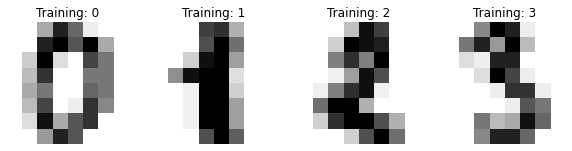

In [12]:
# Visualizing some data for getting understanding

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, data,target):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [16]:
# performing normalization on our data because that's where ML model are superior

scaller = MinMaxScaler()
# Fitting on our data then return data
data = scaller.fit_transform(X = data , y = target)

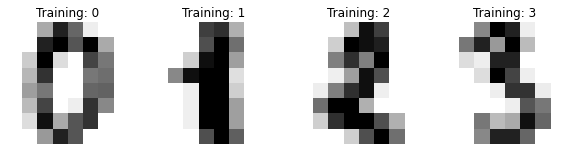

In [18]:
# Again visualizing

# Visualizing some data for getting understanding

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, data,target):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [19]:
# Splitting into train test for validation purpose
train_X , test_X , train_y , test_y = train_test_split(data , target , test_size = 0.3)

In [20]:
train_X.shape , test_X.shape , train_y.shape , test_y.shape

((1257, 64), (540, 64), (1257,), (540,))

In [22]:
# Model fitting on our dataset
# Trying out new model
logistic = LogisticRegression(max_iter = 1000)
decision = DecisionTreeClassifier()
svc = SVC()
random_tree = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gradient_boost = GradientBoostingClassifier()


model_dict = { "logistic" : logistic,
              "decision_forest" : decision,
              "svc" : svc,
              "random_tree" : random_tree,
              "adaboost" : adaboost,
             "gradient_boos" : gradient_boost}

In [32]:
keys = model_dict.keys()
for name in keys:
    print(model_dict[name])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=Fal

In [34]:
# Fitting model on various method and picking up the best
keys = model_dict.keys()
accuracy = {}
for name in keys:
    model_dict[name].fit(train_X , train_y)
    preds = model_dict[name].predict(test_X)
    acc = accuracy_score(test_y , preds)
    accuracy[name] = acc

In [36]:
accuracy

{'logistic': 0.9703703703703703,
 'decision_forest': 0.8277777777777777,
 'svc': 0.987037037037037,
 'random_tree': 0.9777777777777777,
 'adaboost': 0.22962962962962963,
 'gradient_boos': 0.9685185185185186}

##### By seeing above result we can sure that Support vector machines are pretty good than ensembles method

In [37]:
final_model = model_dict["svc"]

In [39]:
#Calculation confusion metric and classfication report

preds = final_model.predict(test_X)

# 1) classification report
svc_cls_repot = classification_report(test_y , preds)

# 2) Confusion metrics
svc_cns_metrix = confusion_matrix(test_y , preds)

In [41]:
# printing out both

print(f"Classification report for classifier SVM:\n"
      f"{svc_cls_repot}\n")

Classification report for classifier SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        61
           3       1.00      0.98      0.99        44
           4       1.00      0.97      0.98        60
           5       0.96      0.98      0.97        55
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        66
           8       0.96      0.98      0.97        51
           9       0.97      0.98      0.98        61

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540




<Figure size 720x720 with 0 Axes>

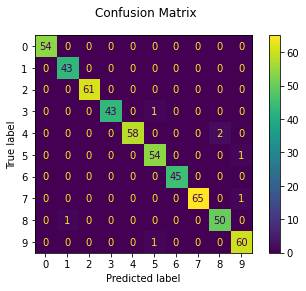

In [44]:
from sklearn import metrics

plt.figure(figsize = (10,10))
disp = metrics.plot_confusion_matrix(final_model, test_X, test_y)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [45]:
# Hence we have performed handwritten digit classification using sklearn ml library